In [ ]:
!pip install -U spacy
import spacy
nlp = spacy.load("en_core_web_sm")
from google.colab import drive
drive.mount('/content/drive')
import random
import re
import math
import pickle
from itertools import product
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
%cd '/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/'
!pip install imohash

from muss.utils.helpers import *


train_df = pd.read_pickle("/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/train_df_0911")
valid_df = pd.read_pickle("/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/valid_df_0911")
test_df = pd.read_pickle("/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/test_df_0911")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
/content/drive/MyDrive/Baseline_MUSS_corrupt/muss
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for varint: filename=varint-1.0.2-py3-none-any.whl size=1980 sha256=789dbf060395578ab6a65071919c3baef69582c8bd1819abf9fa4713c7fe9a34
  Stored in directory: /root/.cache/pip/wheels/69/21/07/09f1c6a7d9b59377aa6d98da6efdd670f7ca40aabd93d02704
Successfully built varint


In [ ]:
from spacy import displacy
from collections import Counter


In [ ]:
def retreive_NER(sentence):
  temp = []
  sentence = nlp(sentence)
  for i in sentence.ents:
    temp.append(i.text)
  return temp 

def retreive_NER_lb(sentence):
  temp = []
  sentence = nlp(sentence)
  for i in sentence.ents:
    temp.append(i.label_)
  return temp 


print(test_df.complex[0])
retreive_NER(test_df.complex[0])

# test_df

One side of the armed conflicts is composed mainly of the Sudanese military and the Janjaweed, a Sudanese militia group recruited mostly from the Afro-Arab Abbala tribes of the northern Rizeigat region in Sudan.


['One', 'Sudanese', 'Janjaweed', 'Sudanese', 'Rizeigat', 'Sudan']

In [ ]:
with open('/content/drive/MyDrive/Lexical_simp/lexical_train_wiki_filtered.pkl','rb') as f:
  # a = [ls_result,ls_replacement]
  data = pickle.load(f)
ls_result, ls_replacement = data[0],data[1]

In [ ]:
for i in ls_replacement:
  for j in i:
    if j == None:
      i.remove(j)
ls_replacement[:10]

[[['evidence', 'support']],
 [['analysis', 'study']],
 [],
 [['legend', 'story']],
 [],
 [['electricity', 'power'], ['Algiers', 'city'], ['allegedly', 'also']],
 [['environments', 'world'],
  ['relies', 'depends'],
  ['signal', 'information'],
  ['transduction.', 'production'],
  ['disease', 'health']],
 [['footbridge', 'bridge']],
 [['presence', 'location'],
  ['seeds', 'leaves'],
  ['fruits', 'plants'],
  ['stimulate', 'encourage'],
  ['digestive', 'nervous'],
  ['expelling', 'eating'],
  ['seeds.', 'fruit']],
 []]

In [ ]:
math.floor(2.5)


2

In [ ]:
input = [i[1] for i in ls_result]

train_input = []
train_target = []
count = 0
for i,j in enumerate(input):
  if count > -1:
    if ls_replacement[i] is not None:
      NER = [k[0] for k in ls_replacement[i] if k is not None]
      NER_ = [k[1] for k in ls_replacement[i] if k is not None]
      # print(NER,NER_)
      if NER:
        if len(NER) >1:
          num_NE = math.floor(len(NER)/2)
          index = random.sample(range(0, len(NER)), num_NE)   ### index that we use to NER 
          index_ = [item for item in range(0,len(NER)) if item not in index]

          NER = [NER[i] for i in index]
          NER_ = [NER_[i] for i in index_]
          # print(NER,NER_)
          sentence_w_control_token = ' <NEXT_NE> '+' <NEXT_NE> '.join(NER) + ' <NEXT_NE> '+' <NEXT_NE> '.join(NER_) + " <SENT_START> " + j
          train_input.append(sentence_w_control_token)
          train_target.append(ls_result[i][0])
          # print(sentence_w_control_token)
        else:
          sentence_w_control_token = ' <NEXT_NE> '+' <NEXT_NE> '.join(NER) + " <SENT_START> " + j
          train_input.append(sentence_w_control_token)
          train_target.append(ls_result[i][0])
      else:
        pass
    else:
      pass

  count += 1 
train_input[:10]

[' <NEXT_NE> evidence <SENT_START> There is manuscript support that Austen continued to work on these pieces as late as the period 1809 â "11',
 ' <NEXT_NE> analysis <SENT_START> In a remarkable comparative study',
 ' <NEXT_NE> legend <SENT_START> Plays and comic puppet theater loosely based on this story were popular throughout Germany in the 16th century',
 ' <NEXT_NE> electricity <NEXT_NE> city <NEXT_NE> also <SENT_START> The Algerian government cut the power supply to at least large parts of the capital city (and also to large parts of the country)',
 ' <NEXT_NE> relies <NEXT_NE> signal <NEXT_NE> world <NEXT_NE> production <NEXT_NE> health <SENT_START> Sensing of both the external and internal world at the cellular level depends on information production Many health processes',
 ' <NEXT_NE> footbridge <SENT_START> A very wide covered bridge joins all platforms at their western ends but does not provide entry to or egress from the station.',
 ' <NEXT_NE> digestive <NEXT_NE> presence

In [ ]:
spacy_NE = []
for sen in ls_result:
  temp = []
  temp.append(retreive_NER(sen[0]))
  spacy_NE.append(temp)

print(spacy_NE[0][0])

ls_replacement_complex = []
for i in ls_replacement:
  temp = []
  for j in i:
    if j != None:
      temp.append(j[0])
  ls_replacement_complex.append(temp)
ls_replacement_complex[:10]

['Austen', '1809', '11']


[['evidence'],
 ['analysis'],
 [],
 ['legend'],
 [],
 ['electricity', 'Algiers', 'allegedly'],
 ['environments', 'relies', 'signal', 'transduction.', 'disease'],
 ['footbridge'],
 ['presence',
  'seeds',
  'fruits',
  'stimulate',
  'digestive',
  'expelling',
  'seeds.'],
 []]

In [ ]:
print(len(spacy_NE))

100630


In [ ]:
# ls_replacement_complex = []
# for i in ls_replacement:
#   temp = []
#   for j in i:
#     if j != None:
#       temp.append(j[0])
#   ls_replacement_complex.append(temp)
# ls_replacement_complex[:10]
ls_replacement[:10]

[[['evidence', 'support']],
 [['analysis', 'study']],
 [],
 [['legend', 'story']],
 [],
 [['electricity', 'power'], ['Algiers', 'city'], ['allegedly', 'also']],
 [['environments', 'world'],
  ['relies', 'depends'],
  ['signal', 'information'],
  ['transduction.', 'production'],
  ['disease', 'health']],
 [['footbridge', 'bridge']],
 [['presence', 'location'],
  ['seeds', 'leaves'],
  ['fruits', 'plants'],
  ['stimulate', 'encourage'],
  ['digestive', 'nervous'],
  ['expelling', 'eating'],
  ['seeds.', 'fruit']],
 []]

In [ ]:

print(spacy_NE[0][0])
ls_replacement_complex[:10]

['Austen', '1809', '11']


[['evidence'],
 ['analysis'],
 [],
 ['legend'],
 [],
 ['electricity', 'Algiers', 'allegedly'],
 ['environments', 'relies', 'signal', 'transduction.', 'disease'],
 ['footbridge'],
 ['presence',
  'seeds',
  'fruits',
  'stimulate',
  'digestive',
  'expelling',
  'seeds.'],
 []]

In [ ]:
# This are the words to be put as regular NE

intersection = []
for i,sen in enumerate(spacy_NE):
  temp = list(set(sen[0]) & set(ls_replacement_complex[i]))
  intersection.append(temp)
intersection = [i[0] for i in intersection if i != []]
# intersection

In [ ]:
print(len(intersection)) ### 

while True: pass
# print(len())

6852


KeyboardInterrupt: ignored

In [ ]:
# input = [i[1] for i in ls_result]

# train_input = []
# train_target = []
# for i,j in enumerate(input):
#   if ls_replacement_complex[i] is not None:
#     NER = [k for k in ls_replacement_complex[i] if k in intersection]

#     DIFF_NER = [k for k in ls_replacement_complex[i] if (k not in intersection) if (k != [])]
    
#     if NER or DIFF_NER:
        
#       sentence_w_control_token = " <NEXT_NE> "+" <NEXT_NE> ".join(NER) + " <NEXT_DIFFICULT_WORD> ".join(DIFF_NER)+ " <SENT_START> " + j
#       train_input.append(sentence_w_control_token)
#       train_target.append(ls_result[i][0])
#     else:
#       pass
#   else:
#     pass
# train_input[:1]

[' <NEXT_NE> evidence <SENT_START> There is manuscript support that Austen continued to work on these pieces as late as the period 1809 â "11']

In [ ]:
input = [i[1] for i in ls_result]

train_input = []
train_target = []
for i,j in enumerate(input):
  if ls_replacement_complex[i] is not None:
    NER = [k for k in ls_replacement_complex[i] if k in intersection]

    DIFF_NER = [k for k in ls_replacement_complex[i] if (k not in intersection) if (k != [])]
    
    if NER or DIFF_NER:
      if len(NER) >1:
        num_NE = math.floor(len(NER)/2)
        index = random.sample(range(0, len(NER)), num_NE)   ### index that we use to NER 
        index_ = [item for item in range(0,len(NER)) if item not in index]

        NER = [NER[i] for i in index]
        NER_ = [NER_[i] for i in index_]
          # print(NER,NER_)
        sentence_w_control_token = ' <NEXT_NE> '+' <NEXT_NE> '.join(NER) + ' <NEXT_NE> '+' <NEXT_NE> '.join(NER_) + " <NEXT_DIFFICULT_WORD> ".join(DIFF_NER) + " <SENT_START> " + j
        train_input.append(sentence_w_control_token)
        train_target.append(ls_result[i][0])



      else:
        sentence_w_control_token = " <NEXT_NE> "+" <NEXT_NE> ".join(NER) + " <NEXT_DIFFICULT_WORD> ".join(DIFF_NER)+ " <SENT_START> " + j
        train_input.append(sentence_w_control_token)
        train_target.append(ls_result[i][0])
    else:
      pass
  else:
    pass
train_input[:1]

In [ ]:
        # if len(NER) >1:
        #   num_NE = math.floor(len(NER)/2)
        #   index = random.sample(range(0, len(NER)), num_NE)   ### index that we use to NER 
        #   index_ = [item for item in range(0,len(NER)) if item not in index]

        #   NER = [NER[i] for i in index]
        #   NER_ = [NER_[i] for i in index_]
        #   # print(NER,NER_)
        #   sentence_w_control_token = ' <NEXT_NE> '+' <NEXT_NE> '.join(NER) + ' <NEXT_NE> '+' <NEXT_NE> '.join(NER_) + " <SENT_START> " + j
        #   train_input.append(sentence_w_control_token)
        #   train_target.append(ls_result[i][0])
        #   # print(sentence_w_control_token)

In [ ]:
train_target[:10]

['There is manuscript evidence that Austen continued to work on these pieces as late as the period 1809 â "11',
 'In a remarkable comparative analysis',
 'Plays and comic puppet theater loosely based on this legend were popular throughout Germany in the 16th century',
 'The Algerian government cut the electricity supply to at least large parts of the capital Algiers (and allegedly to large parts of the country)',
 'Sensing of both the external and internal environments at the cellular level relies on signal transduction. Many disease processes',
 'A very wide covered footbridge joins all platforms at their western ends but does not provide entry to or egress from the station.',
 'Its widespread presence in many seeds and fruits may serve to stimulate the digestive tract into expelling the seeds.',
 "They take up oxygen in the lungs or gills and release it while squeezing through the body's capillaries.",
 'Lemon meringue pie is a type of baked pie',
 "A veritable reference book to Thun

In [ ]:
%ls '/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/resources/datasets'

_0728b9a163b41e514b7a3fd58ac353ee/  _b40da6a19a88e23765584d645638bd0f/
_083d6a2491ee807831b4e4315e2c976a/  _d0b297f1dd76754fe3740a3f9951d84a/
0913_ABCD_NER_wikilarge/            _ebc6678227d70e43a0b5a783f8a44394/
_1c6ce14c3eae374c3db7b8ccc9a029fc/  _f2a14e00e185840d5f6c346254e198a9/
_2fcf00ca2f5030afede9874e3fd9ab99/  NE_recovery/
_362a1e038840b4dd78eca95212233dea/  NE_recovery1/
_3ef304b5c2d0abbe0627ee6b95c0faff/  NE_recoveryt.simple
_51cae6e20661bc4ea3ac9c6dc0c5ff1f/  test_complex_df_0825.pkl
_54645c8788bc40a6de008c8a68cd4a61/  token_asset_0825_complex/
_5e28156b8f74f80c4582609919cb9436/  wikilarge/
_626d6d325e293670e0e04040f3984ce9/  wikilarge_cooc_0823/
_6c7988785a46152b2ab82df72ca814a6/  wikilarge_detokenized/
_967b4f16dae23e887e1339aa154bbf9a/  wikilarge_final/
ABCD_test_complex                   wikilarge_final_complex_0821/
asset/                              wikilarge_final_simple_0821/
asset_simple_0NE_0825/


In [ ]:
data_dir = '/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/resources/datasets/NE_recovery1/'

PHASES = ['train','valid', 'test']
LANGUAGES = ['complex','simple']
data_names = ['train_inputx','train_targetx']
# random.shuffle(train_input)
x = [i for i in range(len(train_input))]
random.shuffle(x)

count = 0
for phase, language in product([PHASES[0]], LANGUAGES):
  index = slice(0,-1500)
  train_inputx = train_input[index]
  train_targetx = train_target[index]
  # print(train_input[:10])
  print(phase+'.'+language)
  with open(data_dir+phase+'.'+language,'w') as f:
    for sen in globals()[data_names[count]]:
      if type(sen) == str:
        f.write("{}\n".format(sen))
  count += 1
f.close()

read_lines(data_dir+phase+'.'+LANGUAGES[0])
# # np.split(train_input)
# random.shuffle(train_input)
# train_input[:10]


train.complex
train.simple


[' <NEXT_NE> evidence <SENT_START> There is manuscript support that Austen continued to work on these pieces as late as the period 1809 â "11',
 ' <NEXT_NE> analysis <SENT_START> In a remarkable comparative study',
 ' <NEXT_NE> legend <SENT_START> Plays and comic puppet theater loosely based on this story were popular throughout Germany in the 16th century',
 ' <NEXT_NE> electricity <NEXT_NE> city <NEXT_NE> also <SENT_START> The Algerian government cut the power supply to at least large parts of the capital city (and also to large parts of the country)',
 ' <NEXT_NE> signal <NEXT_NE> environments <NEXT_NE> depends <NEXT_NE> production <NEXT_NE> health <SENT_START> Sensing of both the external and internal world at the cellular level depends on information production Many health processes',
 ' <NEXT_NE> footbridge <SENT_START> A very wide covered bridge joins all platforms at their western ends but does not provide entry to or egress from the station.',
 ' <NEXT_NE> digestive <NEXT_NE> 

In [ ]:
count = 0
for phase, language in product([PHASES[1]], LANGUAGES):
  index = slice(-1499,-500)
  train_inputx = train_input[index]
  train_targetx = train_target[index]
  # print(train_input[:10])
  print(phase+'.'+language)
  with open(data_dir+phase+'.'+language,'w') as f:
    for sen in globals()[data_names[count]]:
      if type(sen) == str:
        f.write("{}\n".format(sen))
  count += 1
f.close()
read_lines(data_dir+phase+'.'+language)

valid.complex
valid.simple


['Carlos Alberto Carvalho dos Anjos Junior "Juninho" (born September 15',
 'SJSU also has achieved an international reputation for its judo program',
 'The western part went to India (and was named West Bengal) while the eastern part joined Pakistan as a province called East Bengal (later renamed East Pakistan',
 'This includes remote island groups',
 'Degenerate Art was also the title of an exhibition',
 'He was wounded in East Prussia in 1945 and was transported home to Stuttgart.',
 'Hucqueliers is a commune in the Pas-de-Calais department in the Nord-Pas-de-Calais region of France.',
 'History Introduction Hartley has come a long way since the "clearing in the wood where the deer are" of a thousand years ago',
 'The Slovak climate lies between the temperate and continental climate zones with relatively warm summers and cold',
 'Three suppliers provide turbofan engines for the A320 series: CFM International with their CFM56',
 'Since excessive transposon activity can destroy a genom

In [ ]:
count = 0
for phase, language in product([PHASES[2]], LANGUAGES):
  index = slice(-499,-1)
  train_inputx = train_input[index]
  train_targetx = train_target[index]
  # print(train_input[:10])
  print(phase+'.'+language)
  with open(data_dir+phase+'.'+language,'w') as f:
    for sen in globals()[data_names[count]]:
      if type(sen) == str:
        f.write("{}\n".format(sen))
  count += 1
f.close()
read_lines(data_dir+phase+'.'+language)

test.complex
test.simple


['The administrative and judicial functions of the government were shifted from Kuala Lumpur to Putrajaya.',
 "Originally released as a bonus disc on the deluxe edition of B 'Day",
 'The JVM is a crucial component of the Java Platform.',
 'A large dam across the Yangtze River was originally envisioned by Sun Yat-sen in The International Development of China',
 'His body was reburied under two metres of concrete to prevent further attempts.',
 'The contemporary status of the Mandaeans has prompted a number of American intellectuals and civil rights activists to call upon the U.S. government to extend refugee status to the community.',
 'The term syntax is also sometimes used to refer to the rules governing the behavior of mathematical systems',
 'Between 1955 and 1961 Genet wrote three more plays as well as an essay called "What Remains of a Rembrandt Torn Into Four Equal Pieces and Flushed Down the Toilet"',
 'The present city can clearly be traced back to AD 995',
 'The midnight sun i

In [ ]:
train_target

['There is manuscript evidence that Austen continued to work on these pieces as late as the period 1809 â "11',
 'In a remarkable comparative analysis',
 'Plays and comic puppet theater loosely based on this legend were popular throughout Germany in the 16th century',
 'The Algerian government cut the electricity supply to at least large parts of the capital Algiers (and allegedly to large parts of the country)',
 'Sensing of both the external and internal environments at the cellular level relies on signal transduction. Many disease processes',
 'A very wide covered footbridge joins all platforms at their western ends but does not provide entry to or egress from the station.',
 'Its widespread presence in many seeds and fruits may serve to stimulate the digestive tract into expelling the seeds.',
 "They take up oxygen in the lungs or gills and release it while squeezing through the body's capillaries.",
 'Lemon meringue pie is a type of baked pie',
 "A veritable reference book to Thun

In [ ]:
range(0,len(train_input))

range(0, 64456)

In [ ]:
for i,r in train_df.iterrows():
  r.complex_NER = retreive_NER(r.complex)
  r.simple_NER = retreive_NER(r.simple)
  r.co_occur_NER = list(set(r.complex_NER) & set(r.simple_NER))

train_df

,index,complex,simple,complex_NER,simple_NER,co_occur_NER
0,0,There is manuscript evidence that Austen conti...,There is some proof that Austen continued to w...,"[James Edward Austen, as late as 1814, Anna, 1...","[James Edward, Anna Austen, 1814]","[James Edward, Austen, s late, 1814, Anna]"
1,1,"In a remarkable comparative analysis, Mandaean...",Mandaean scholar Säve-Söderberg showed that Ma...,"[Psalms of Thomas, Säve-Söderberg, Mandaean, M...","[Psalms of Thomas, Säve-Söderberg, Mandaean, M...","[Psalms of Thomas, Säve-Söderberg, Mandaean, M..."
2,2,"Before Persephone was released to Hermes, who ...",When Demeter went to the Underworld to rescue ...,"[a period each year, Persephone, Hermes, Hades...","[Underworld, Persephone, Demeter, Hades]","[Persephone, underworld, Hades]"
3,3,Cogeneration plants are commonly found in dist...,Cogeneration plants are commonly found in dist...,[Cogeneration],[Cogeneration],[Cogeneration]
4,4,"Geneva (,;,;,;;) is the second-most-populous c...",The city's main newspaper is the Tribune de Ge...,"[Switzerland, Romandie, Geneva, second, Zürich...","[the Tribune de Genève, 1 February 1879, James...",[]
...,...,...,...,...,...,...
249161,296397,These structures form at the high-pressure dep...,These structures form at the high-pressure dep...,[Lake Vostok],[Lake Vostok],[Lake Vostok]
249162,296398,Saint-Maixant is a commune in the Gironde depa...,"Saint-Maixant, Gironde is a commune. It is fou...","[Saint-Maixant, Aquitaine in, Gironde, France]","[Aquitaine in the Gironde, Saint-Maixant, France]","[ne in the Gironde, Saint-Maixant, Aquitaine i..."
249163,296399,The Hollywood Walk of Fame is a series of side...,There are many stars on the sidewalk.,"[Vine Street in Hollywood, Hollywood Walk of F...",[],[walk]
249164,296400,Boulogne-Billancourt is the most populous subu...,"Consequently, Boulogne-Billancourt is one of t...","[Boulogne-Billancourt, Europe, Paris, one]","[Boulogne-Billancourt, Europe, one]","[Boulogne-Billancourt, Europe]"


In [ ]:
for i,r in valid_df.iterrows():
  r.complex_NER = retreive_NER(r.complex)
  r.simple_NER = retreive_NER(r.simple)
  r.co_occur_NER = list(set(r.complex_NER) & set(r.simple_NER))





In [ ]:
complex_len = 0
cooc_len = 0
for i,r in train_df.iterrows():

  complex_len+=len(r.complex_NER)
  cooc_len += len(r.co_occur_NER)
print(cooc_len/complex_len)

0.6931201527425618


In [ ]:
with open('/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/train_df_spacy', 'wb') as fp:
    pickle.dump(train_df, fp)

with open('/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/valid_df_spacy', 'wb') as fp:
    pickle.dump(valid_df, fp)

with open('/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/test_df_spacy', 'wb') as fp:
    pickle.dump(test_df, fp)

In [ ]:
with open('/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/train_df_spacy', 'rb') as fp:
    train_df = pickle.load(fp)

with open('/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/valid_df_spacy', 'rb') as fp:
    valid_df = pickle.load(fp)

with open('/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/test_df_spacy', 'rb') as fp:
    test_df = pickle.load(fp)

In [ ]:
valid_df

sentence = valid_df.complex[0]
sentence
for i in nlp(sentence).ents:
  # print(i.label_)
  print(type(i))

<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>


In [ ]:
label_list = []
for i,r in valid_df.iterrows():
  NERs = retreive_NER_lb(r.complex)
  for k in NERs:
    label_list.append(k)
print(label_list)


['ORG', 'ORG', 'GPE', 'PERSON', 'PERSON', 'GPE', 'DATE', 'GPE', 'NORP', 'ORG', 'GPE', 'GPE', 'WORK_OF_ART', 'WORK_OF_ART', 'ORDINAL', 'CARDINAL', 'DATE', 'CARDINAL', 'EVENT', 'CARDINAL', 'GPE', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'GPE', 'PERSON', 'ORG', 'ORG', 'DATE', 'ORG', 'DATE', 'ORDINAL', 'CARDINAL', 'CARDINAL', 'GPE', 'PERSON', 'FAC', 'ORG', 'DATE', 'PERSON', 'ORG', 'DATE', 'CARDINAL', 'DATE', 'GPE', 'PERSON', 'PERSON', 'GPE', 'GPE', 'GPE', 'GPE', 'ORG', 'PERSON', 'PERSON', 'DATE', 'GPE', 'GPE', 'ORG', 'NORP', 'GPE', 'DATE', 'EVENT', 'ORG', 'GPE', 'ORG', 'CARDINAL', 'CARDINAL', 'ORDINAL', 'CARDINAL', 'CARDINAL', 'PERSON', 'DATE', 'ORG', 'CARDINAL', 'CARDINAL', 'ORG', 'ORG', 'DATE', 'GPE', 'GPE', 'ORG', 'CARDINAL', 'GPE', 'ORG', 'ORG', 'LOC', 'DATE', 'ORG', 'GPE', 'GPE', 'GPE', 'LOC', 'ORDINAL', 'GPE', 'GPE', 'PERSON', 'ORG', 'GPE', 'GPE', 'DATE', 'ORDINAL', 'DATE', 'ORG', 'DATE', 'NORP', 'PERSON', 'ORG', 'LANGUAGE', 'PERSON', 'DATE', 'GPE', 'GPE', 'NORP', 'PERSON', 'P

TypeError: ignored

In [ ]:
from collections import Counter


# print(label_list.count())
Counter(label_list)
len(train_df)

249166

In [ ]:
label_list = []
for i,r in train_df.iterrows():
  if i % 1000 == 0:
    print(i, len(train_df))
  NERs = retreive_NER_lb(r.complex)
  for k in NERs:
    label_list.append(k)
# print(label_list)


0 249166
1000 249166
2000 249166
3000 249166
4000 249166
5000 249166
6000 249166
7000 249166
8000 249166
9000 249166
10000 249166
11000 249166
12000 249166
13000 249166
14000 249166
15000 249166
16000 249166
17000 249166
18000 249166
19000 249166
20000 249166
21000 249166
22000 249166
23000 249166
24000 249166
25000 249166
26000 249166
27000 249166
28000 249166
29000 249166
30000 249166
31000 249166
32000 249166
33000 249166
34000 249166
35000 249166
36000 249166
37000 249166
38000 249166
39000 249166
40000 249166
41000 249166
42000 249166
43000 249166
44000 249166
45000 249166
46000 249166
47000 249166
48000 249166
49000 249166
50000 249166
51000 249166
52000 249166
53000 249166
54000 249166
55000 249166
56000 249166
57000 249166
58000 249166
59000 249166
60000 249166
61000 249166
62000 249166
63000 249166
64000 249166
65000 249166
66000 249166
67000 249166
68000 249166
69000 249166
70000 249166
71000 249166
72000 249166
73000 249166
74000 249166
75000 249166
76000 249166
77000 249166

([<matplotlib.patches.Wedge at 0x7faf59c4b290>,
 [Text(-0.5747373040306243, 0.9379109933013953, 'PERSON'),
  Text(-1.0685323345921725, 0.26122528578030413, 'CARDINAL'),
  Text(-0.9161206242362604, -0.6088702668458732, 'ORG'),
  Text(-0.1707538436784925, -1.0866660594998911, 'NORP'),
  Text(0.7028024021863392, -0.8462084751886566, 'GPE'),
  Text(1.070950122597173, 0.251129119994278, 'DATE'),
  Text(0.7605317923457686, 0.7947272442991575, 'ORDINAL'),
  Text(0.6760517008565935, 0.8677292767729503, 'LANGUAGE'),
  Text(0.6326298223743849, 0.8998774960196273, 'EVENT'),
  Text(0.5057464058849949, 0.9768421433038248, 'LOC'),
  Text(0.3714513925150832, 1.0353858522302717, 'QUANTITY'),
  Text(0.28467641420789613, 1.0625249828562784, 'WORK_OF_ART'),
  Text(0.1979984749741217, 1.0820335502690859, 'PRODUCT'),
  Text(0.12487564906163534, 1.0928888654714328, 'FAC'),
  Text(0.07076714141296907, 1.0977212814263178, 'PERCENT'),
  Text(0.04761212285377085, 1.0989691013660745, 'TIME'),
  Text(0.0253162031

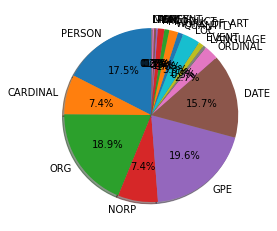

In [ ]:
import matplotlib.pyplot as plt
counts = Counter(label_list)




fig1, ax1 = plt.subplots()
ax1.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)



# pyplot.pie(counts)

In [ ]:
with open('/content/drive/MyDrive/Baseline_MUSS_corrupt/muss/qualitative/label_dict_train_df','wb') as fp:
  pickle.dump(counts,fp)

In [ ]:
while True: pass

Training... 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)


!rm -rf /swift

!df -h .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Wed Aug 10 19:57:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    32W / 250W |   5545MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+------

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
%cd /content/drive/MyDrive/Baseline_MUSS/muss
!pip install -e . 
!pip install -U spacy ==2.0.0
!python -m spacy download en_core_web_md
import spacy


from muss.fairseq.main import fairseq_train_and_evaluate_with_parametrization
from muss.mining.training import get_bart_kwargs, get_score_rows
from muss.resources.prepare import prepare_wikilarge_detokenized, prepare_asset
from muss.resources.datasets import create_smaller_dataset


# This dataset should exist in resources/datasets/ and contain the following files:
# train.complex, train.simple, valid.complex, valid.simple, test.complex, test.simple



prepare_wikilarge_detokenized()
prepare_asset()
dataset = 'wikilarge_detokenized'
kwargs = get_bart_kwargs(dataset=dataset, language='en', use_access=True)
kwargs['train_kwargs']['ngpus'] = 1  # Set this from 8 to 1 for local training
kwargs['train_kwargs']['max_tokens'] = 512  # Lower this number to prevent OOM
# kwargs['train_kwargs']['warmup_updates'] = 1000
# kwargs['train_kwargs']['max_update'] = 4000
# kwargs['train_kwargs']['save_interval_updates'] = 1001
result = fairseq_train_and_evaluate_with_parametrization(**kwargs)

/content/drive/MyDrive/Baseline_MUSS/muss
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Baseline_MUSS/muss
  Cloning https://github.com/feralvam/easse.git to /tmp/pip-install-l32xq8tr/easse_79a7b13c493c4a248bca216ede1db171
  Running command git clone -q https://github.com/feralvam/easse.git /tmp/pip-install-l32xq8tr/easse_79a7b13c493c4a248bca216ede1db171
  Cloning https://github.com/kpu/kenlm.git to /tmp/pip-install-l32xq8tr/kenlm_d3888c7e05a64906ac59907481b5c729
  Running command git clone -q https://github.com/kpu/kenlm.git /tmp/pip-install-l32xq8tr/kenlm_d3888c7e05a64906ac59907481b5c729
  Cloning https://github.com/facebookresearch/text-simplification-evaluation.git (to revision main) to /tmp/pip-install-l32xq8tr/tseval_57d793f3f1b24e6cad627694376a010d
  Running command git clone -q https://github.com/facebookresearch/text-simplification-evaluation.git /tmp/pip-install-l32xq8tr/tseval_57d793

/content/drive/MyDrive/Baseline_MUSS/muss/muss/fairseq/main.py:32: UserWarning: WARNING: Dataset has validation samples in training set!
  warnings.warn('WARNING: Dataset has validation samples in training set!')
/content/drive/MyDrive/Baseline_MUSS/muss/muss/fairseq/main.py:36: UserWarning: WARNING: Dataset has test samples in training set!
  warnings.warn('WARNING: Dataset has test samples in training set!')


exp_dir=/content/drive/MyDrive/Baseline_MUSS/muss/experiments/fairseq/local_1660161632447
------------------------------------------------------------------------
------------------------------------------------------------------------
This is getting mad......, I definitly set the max update to 4000
-------------Ive reset the max_update to----------------- 4000
-------------Ive reset the save interval to----------------- 1001
------------------------------------------------------------------------
------------------------------------------------------------------------
fairseq-train /content/drive/MyDrive/Baseline_MUSS/muss/resources/datasets/_9585ac127caca9d7160a28f1d8180050/fairseq_preprocessed_complex-simple --task translation --source-lang complex --target-lang simple --save-dir /content/drive/MyDrive/Baseline_MUSS/muss/experiments/fairseq/local_1660161632447/checkpoints --optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 0.0 --criterion label_smoothed_cross_entropy --label-sm

|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 1            |        cudaMalloc retries: 22        |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   15064 MB |   15399 MB |    1361 GB |    1346 GB |
|       from large pool |   14936 MB |   15220 MB |    1003 GB |     988 GB |
|       from small pool |     128 MB |     340 MB |     357 GB |     357 GB |
|---------------------------------------------------------------------------|
| Active memory         |   15064 MB |   15399 MB |    1361 GB |    1346 GB |
|       from large pool |   14936 MB |   15220 MB |    1003 GB |     988 GB |
|       from small pool |     128 MB |     340 MB |     357 GB |

In [ ]:
print('training done')
!df -h .
# while True: pass